In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [14]:
train_dir = "/kaggle/input/emotion-detection-fer/train" 
test_dir = "/kaggle/input/emotion-detection-fer/test"

In [15]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [16]:
img_size=48

In [17]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [19]:
model.compile(
    optimizer = Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
epochs = 45
batch_size = 64
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 67s 152ms/step - accuracy: 0.2149 - loss: 2.2394 - val_accuracy: 0.2249 - val_loss: 2.0109
Epoch 2/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 47s 132ms/step - accuracy: 0.2819 - loss: 1.8365 - val_accuracy: 0.3052 - val_loss: 1.8048
Epoch 3/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 48s 134ms/step - accuracy: 0.3671 - loss: 1.6262 - val_accuracy: 0.2786 - val_loss: 2.7220
Epoch 4/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 46s 127ms/step - accuracy: 0.4397 - loss: 1.4551 - val_accuracy: 0.4944 - val_loss: 1.4105
Epoch 5/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 45s 125ms/step - accuracy: 0.4970 - loss: 1.3226 - val_accuracy: 0.5286 - val_loss: 1.1996
Epoch 6/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.5245 - loss: 1.2400 - val_accuracy: 0.5601 - val_loss: 1.1754
Epoch 7/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.5340 - loss: 1.2184 - val_accuracy: 0.5559 - val_loss: 1.1684
Epoch 8/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 46s 128ms/step - accuracy: 0.5565 - loss: 1

In [21]:
model.save('final_affectnet_model.keras')
print("Đã lưu model cuối cùng thành công!")

Đã lưu model cuối cùng thành công!


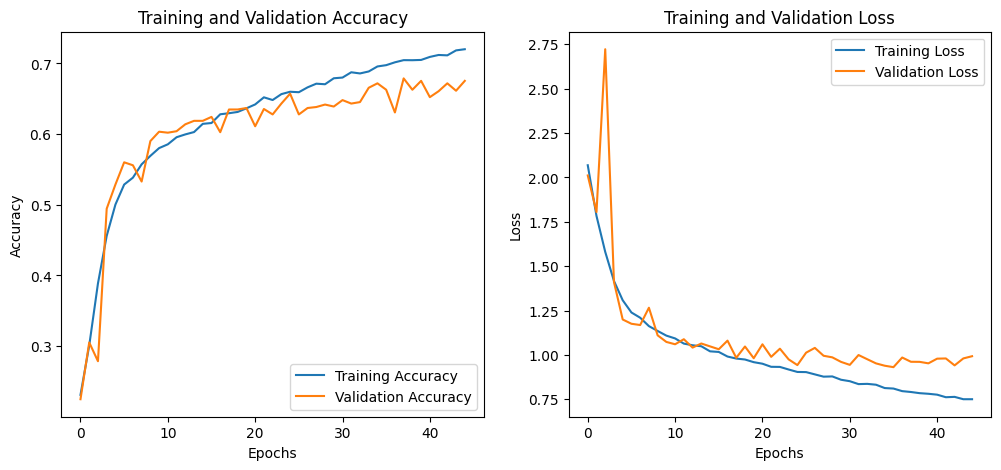

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.6714 - loss: 1.0326
Final Loss on Test Set: 0.9927020072937012
Final Accuracy on Test Set: 0.6752793192863464


In [20]:
import matplotlib.pyplot as plt
# Lấy các giá trị accuracy và loss từ history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))

# Biểu đồ độ chính xác
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


# Biểu đồ mất mát
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Đánh giá cuối cùng trên tập test
final_loss, final_accuracy = model.evaluate(validation_generator)
print(f"Final Loss on Test Set: {final_loss}")
print(f"Final Accuracy on Test Set: {final_accuracy}")